# Diwali Sales Analysis

### Objective :

* Improve customer experience by analysing sales data
* Increase revenue

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Diwali Sales Data (1).csv')
df.head(20)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# drop null columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop na values
df.dropna(inplace=True)

In [9]:
df['Amount']=df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

### Gender 

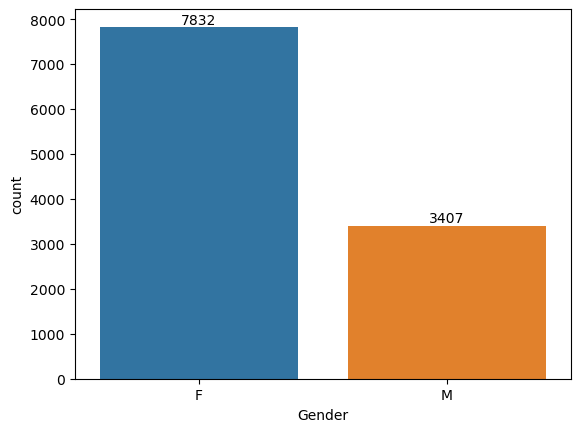

In [24]:
# plotting a bar chart for Gender and it's count
x = sns.countplot(data=df,x='Gender')

for bars in x.containers:
    x.bar_label(bars)

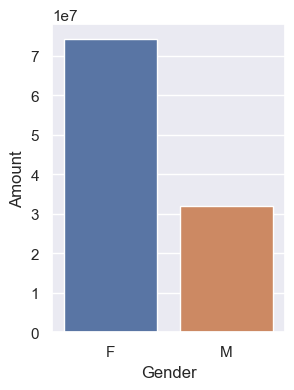

In [77]:
# plotting a bar chart for gender vs total amount

plt.figure(figsize=(3,4))
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.show()

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

###  Age

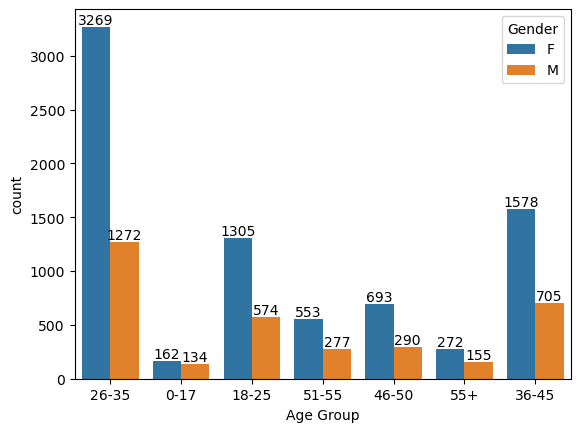

In [19]:
x = sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in x.containers:
    x.bar_label(bars)

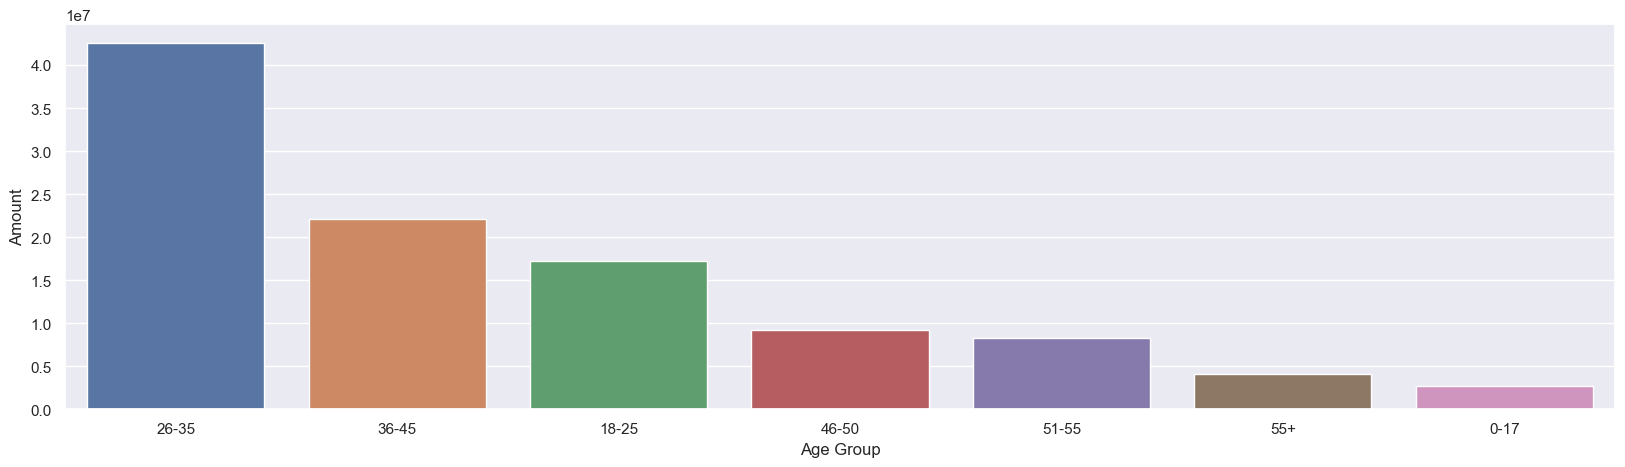

In [73]:
sales_gen = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_gen)
plt.show()

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State

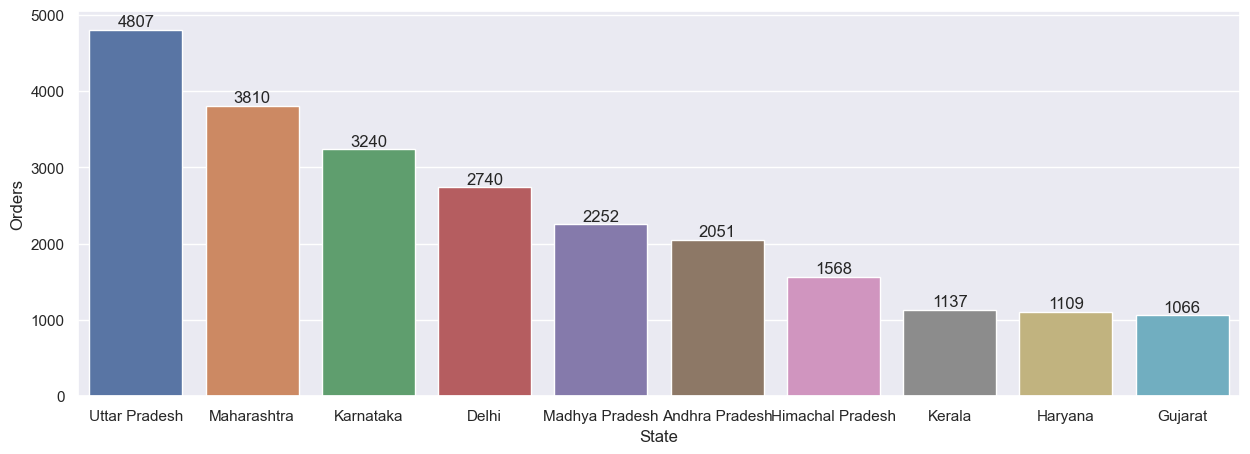

In [31]:
# total number of orders from top 10 states

state_orders = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

x= sns.barplot(data = state_orders ,x = 'State',y ='Orders')
for bars in x.containers:
    x.bar_label(bars)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively


### Marital_Status

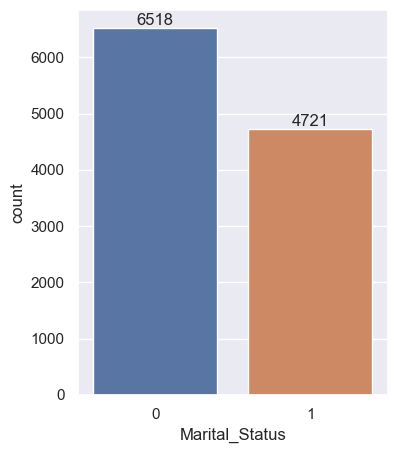

In [40]:
plt.figure(figsize = (4,5))
status = sns.countplot(data = df,x = 'Marital_Status')

for bars in status.containers:
    status.bar_label(bars)

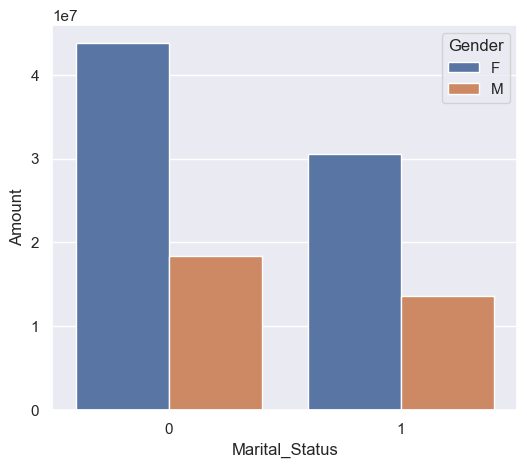

In [41]:
plt.figure(figsize = (6,5))
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

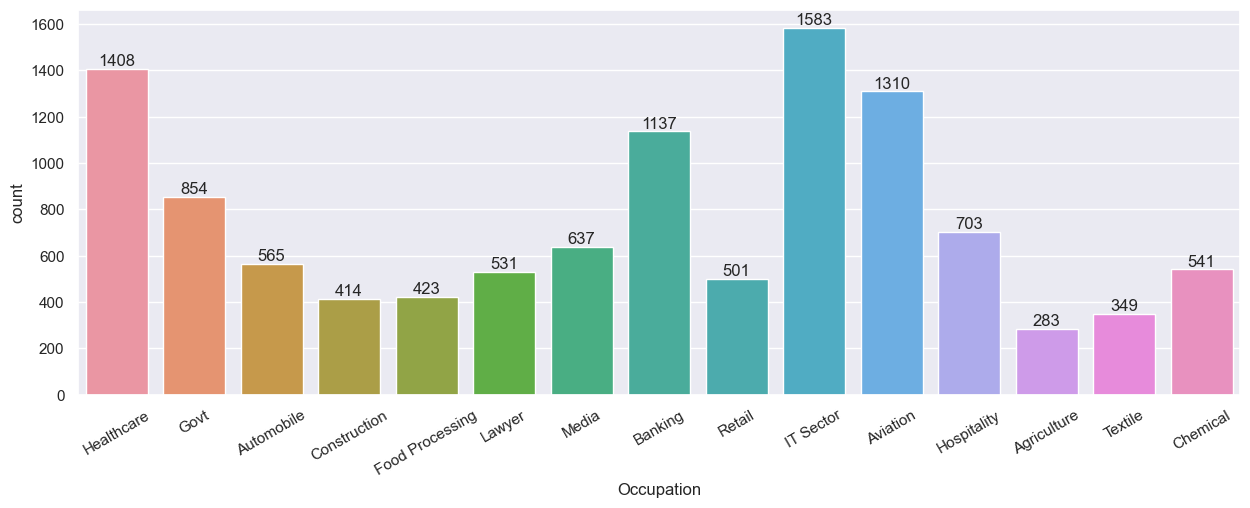

In [43]:

ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation = 30)

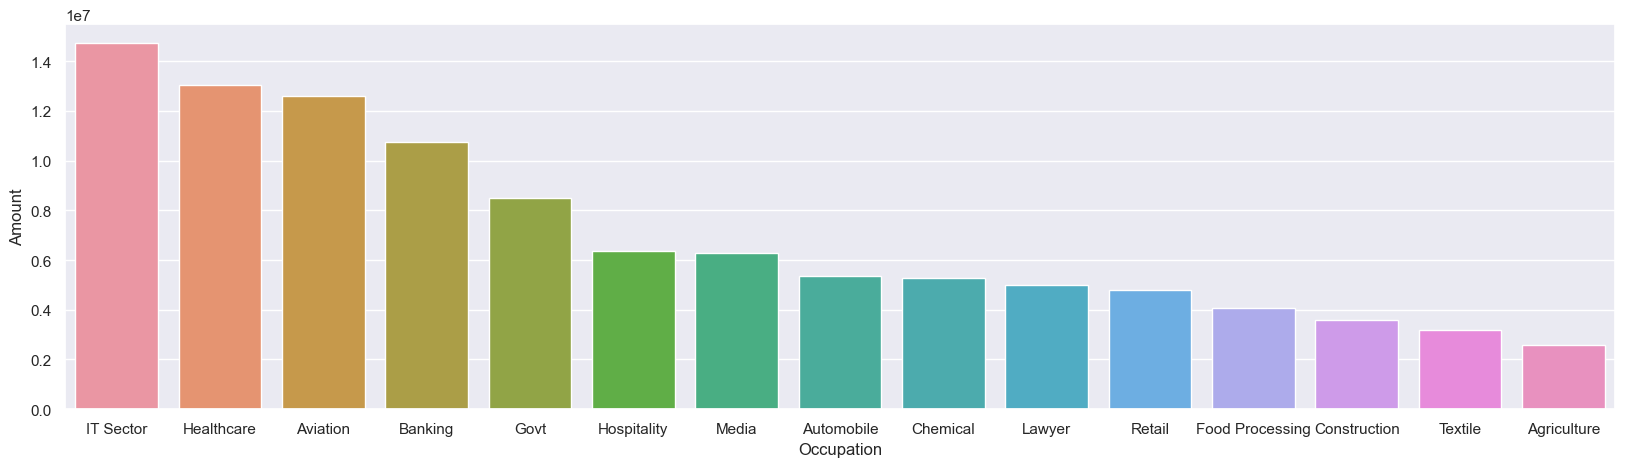

In [72]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Products

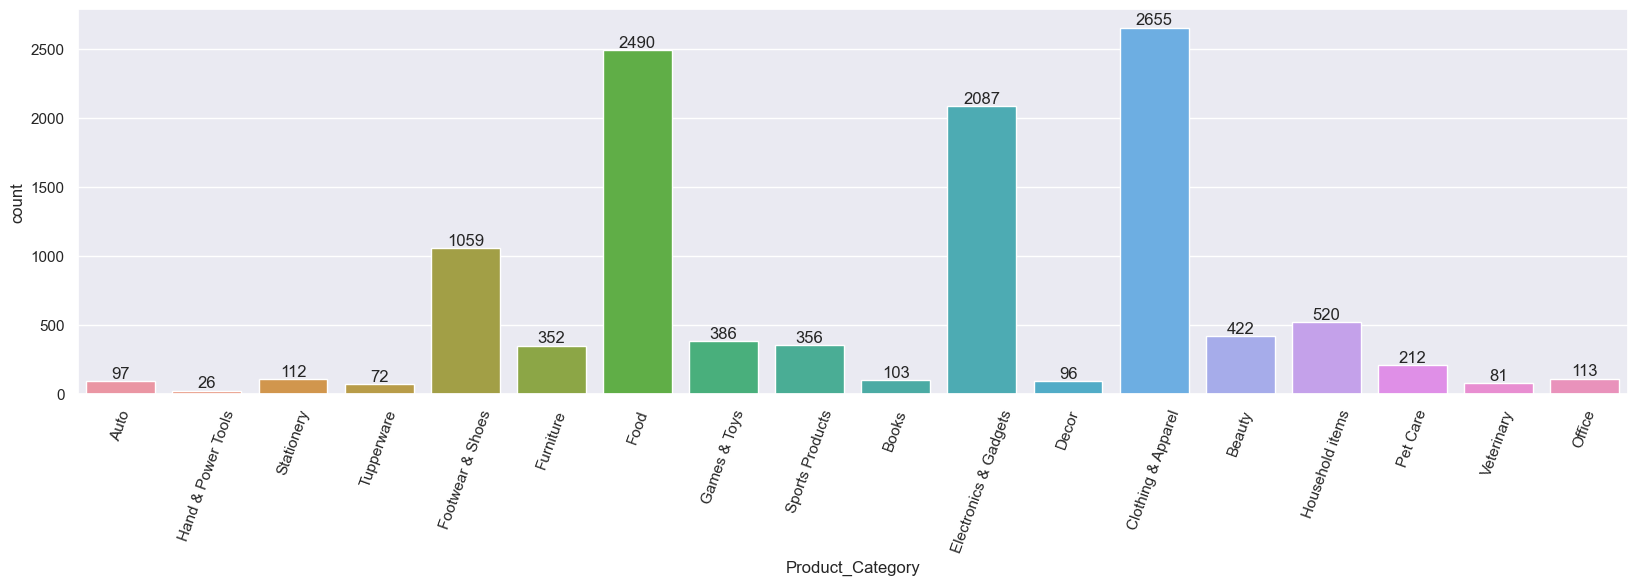

In [67]:

ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=70)
plt.show()

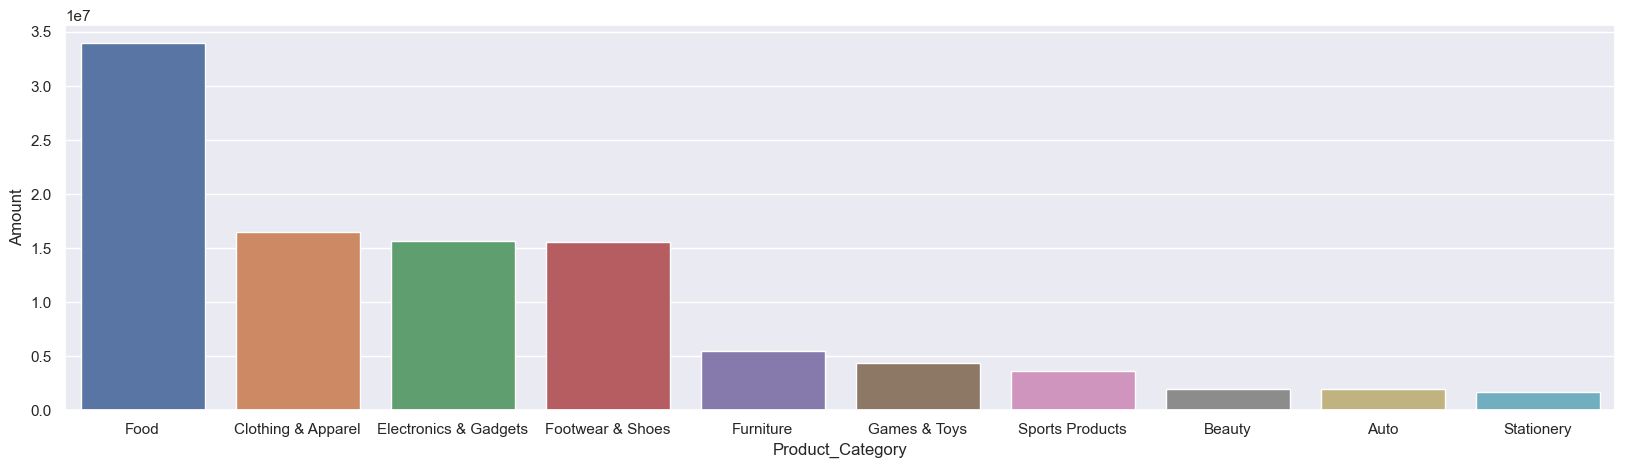

In [71]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.show()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

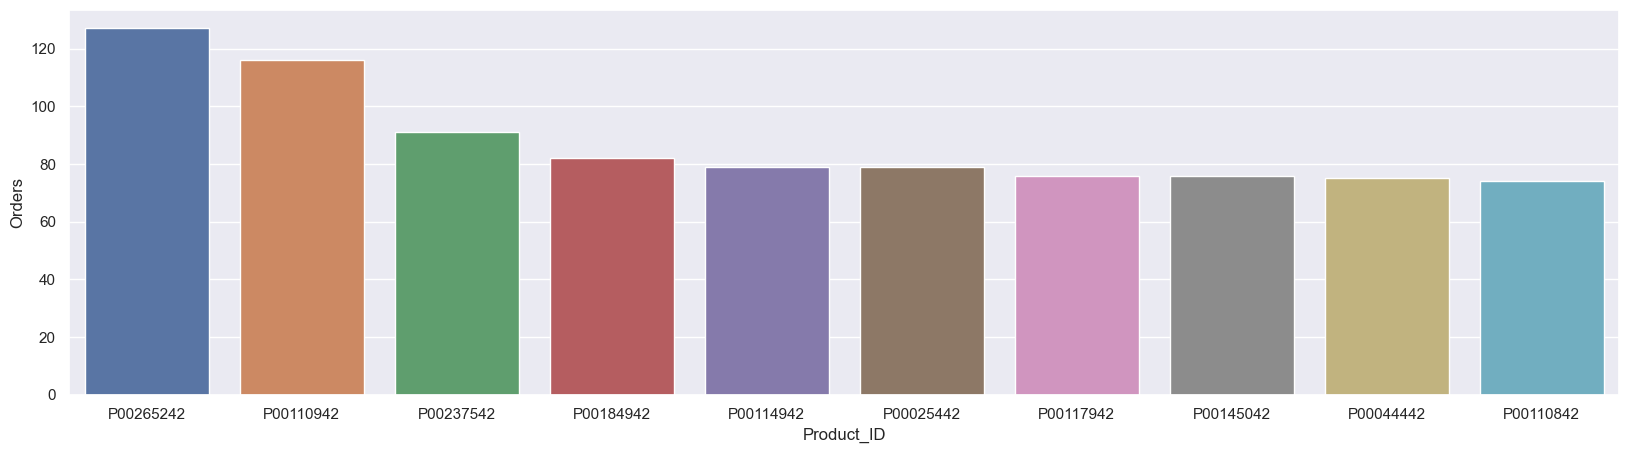

In [78]:
# top 10 most sold products
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.show()

## Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*